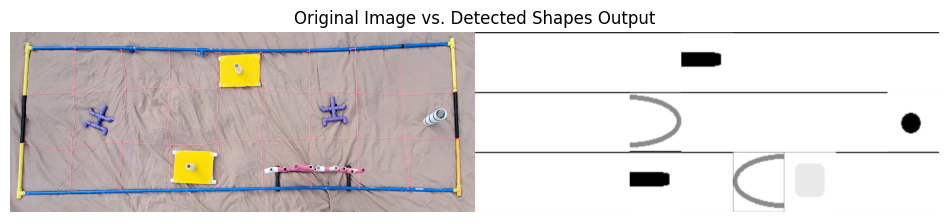

Task completed: Comparison image saved as 'done_task2.png'.


In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the main image (input image with shapes)
image_path = r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\coral-reef-2.jpg"
original_image = cv2.imread(image_path)

# Define grid dimensions (3 rows by 9 columns for a 3x9 grid)
grid_rows, grid_cols = 3, 9
cell_height, cell_width = original_image.shape[0] // grid_rows, original_image.shape[1] // grid_cols

# Load reference shape images
shape_paths = {
    "circle": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\circle.png",
    "circle_map": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\circle_map.png",
    "Coral1": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\Coral1.png",
    "Coral1_map": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\Coral1_map.png",
    "Coral2": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\Coral2.png",
    "Coral2_map": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\Coral2_map.png",
    "Empty": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\Empty.png",
    "star": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\star.png",
    "star_map": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\star_map.png",
    "yellowSquare": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\yellowSquare.png",
    "yellowSquare_map": r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\photos\yellowSquare_map.png"
}

# Load reference images and resize to fit cells
shape_images = {name: cv2.imread(path, cv2.IMREAD_GRAYSCALE) for name, path in shape_paths.items()}
for name in shape_images:
    shape_images[name] = cv2.resize(shape_images[name], (cell_width, cell_height))

# Create a blank output canvas for detected shapes
output_image = np.ones_like(original_image) * 255  # Start with a white background

# Define a kernel for dilation (3x3 square kernel for moderate dilation)
kernel = np.ones((3, 3), np.uint8)

# Iterate through each cell in the grid
for row in range(grid_rows):
    for col in range(grid_cols):
        # Calculate the cell's bounding box within the original image
        x_start, y_start = col * cell_width, row * cell_height
        x_end, y_end = x_start + cell_width, y_start + cell_height
        cell = original_image[y_start:y_end, x_start:x_end]
        
        # Convert the cell to grayscale, apply thresholding and dilation to highlight shapes
        gray_cell = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
        _, thresholded_cell = cv2.threshold(gray_cell, 252, 255, cv2.THRESH_BINARY_INV)
        dilated_cell = cv2.dilate(thresholded_cell, kernel, iterations=1)

        # Compare the cell with each reference shape using template matching
        best_match = "Empty"
        highest_similarity = 0

        for shape_name, shape_image in shape_images.items():
            # Resize the dilated cell to match the reference shape dimensions
            resized_cell = cv2.resize(dilated_cell, (shape_image.shape[1], shape_image.shape[0]))
            
            # Perform template matching and get similarity score
            result = cv2.matchTemplate(resized_cell, shape_image, cv2.TM_CCOEFF_NORMED)
            similarity = result[0][0]  # Get the highest match value
            
            # Check if this shape is a better match
            if similarity > highest_similarity:
                highest_similarity = similarity
                best_match = shape_name

        # Place the detected shape on the output image at the corresponding location
        if best_match in shape_images:
            output_shape = cv2.cvtColor(shape_images[best_match], cv2.COLOR_GRAY2BGR)
            output_image[y_start:y_end, x_start:x_end] = output_shape

# Stack original and output images side by side for comparison
comparison_image = np.hstack((original_image, output_image))

# Save the output comparison image
output_path = r"D:\Vortex\ROV\Phase 2\Tasks2025\task 4\done_task2.png"
cv2.imwrite(output_path, comparison_image)

# Display the comparison image
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(comparison_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original Image vs. Detected Shapes Output")
plt.show()

print("Task completed: Comparison image saved as 'done_task2.png'.")
